<img src='https://www.icos-cp.eu/sites/default/files/2017-11/ICOS_CP_logo.png' width=400 align=right>

# ICOS Carbon Portal Python Libraries: icoscp_stilt
## Example: STILT CH$_4$ & CO$_2$  timeseries

In this example, we load STILT timeseries data, create some plots, and compare the STILT data with observed data.


### Documentation

Full documentation for the library is available on the [project page](https://icos-carbon-portal.github.io/pylib/icoscp_stilt/). Information on how to install it and obtain the wheel package can be found on [pypi.org](https://pypi.org/project/icoscp_stilt/), while the source code is accessible on [Github](https://github.com/ICOS-Carbon-Portal/pylib).

In [1]:
# Import STILT tools:
from icoscp_stilt import stilt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# allow for interactive plots
#%matplotlib widget

# default size for plots
plt.rcParams['figure.figsize'] = [10, 5] 


## Model results

### Select a STILT station from the list of all available STILT results

You can also find available stations and create new ones in the [STILT viewer](https://stilt.icos-cp.eu/).

In [2]:
# list of Stilt stations
stations = stilt.list_stations()

station_info_lookup = {s.id: s for s in stations}

# example: KIT Karlsruhe station, samplig height 100 m above ground
STILT_station = station_info_lookup['KIT100']

# STILT_station contains information on the station location in the STILT model 
# and also the id and sampling height of the corresponding measurement station - if one exists
STILT_station

StiltStation(id='KIT100', name='Karlsruhe', lat=49.09, lon=8.43, alt=100, countryCode='DE', years=[2007, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], icosId='KIT', icosHeight=100.0)

### Retrieve the CO$_2$ and CH$_4$ time series

Find more information on how to retrieve time series data for the station by using `help(stilt)`

In [3]:
STILT_time_series = stilt.fetch_result_ts('KIT100', '2018-01-01', '2018-12-31')

# use date and time information (i.e. column 'isodate') as index
STILT_time_series.set_index('isodate', inplace=True)

columns = STILT_time_series.columns.to_list()
columns_co2 = [s for s in columns if 'co2' in s]
columns_ch4 = [s for s in columns if 'ch4' in s]

# display all co2 columns
# .head() shows the first five rows of the dataframe
display(STILT_time_series[columns_co2].head())

# display all ch4 columns
display(STILT_time_series[columns_ch4].head())


,co2.background,co2.bio,co2.bio.gee,co2.bio.resp,co2.cement,co2.energy,co2.fuel,co2.fuel.bio,co2.fuel.coal,co2.fuel.gas,co2.fuel.oil,co2.fuel.otherfuel,co2.fuel.waste,co2.industry,co2.non_fuel,co2.other_categories,co2.residential,co2.stilt,co2.transport
isodate,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,407.678170,2.524792,-1.021319,3.546112,0.123952,1.268606,3.208407,0.419731,0.294588,1.106595,1.335807,0.051686,0.051686,0.429370,0.044852,0.003408,1.051574,413.580172,0.624252
2018-01-01 03:00:00,407.755623,1.563985,-0.493714,2.057699,0.026363,1.031585,1.630513,0.191802,0.272251,0.606633,0.542026,0.017801,0.017801,0.217525,0.031915,0.001979,0.292550,411.008398,0.145153
2018-01-01 06:00:00,407.347136,1.573949,-0.012104,1.586053,0.011833,1.071477,1.649554,0.198231,0.290864,0.615927,0.525341,0.019191,0.019191,0.108877,0.019026,0.001961,0.385405,410.601498,0.112694
2018-01-01 09:00:00,407.448274,1.558925,-0.001353,1.560279,0.010814,1.283865,2.832694,0.345492,0.396588,0.985980,1.075532,0.029101,0.029101,0.170688,0.030887,0.001879,1.005435,411.881593,0.412529
2018-01-01 12:00:00,407.512367,1.239419,-0.158967,1.398385,0.184364,0.884306,1.803940,0.256571,0.277185,0.572529,0.678348,0.019306,0.019306,0.289031,0.022181,0.001785,0.605774,410.762271,0.229589


,ch4.agriculture,ch4.anthropogenic,ch4.background,ch4.energy,ch4.natural,ch4.other_categories,ch4.other_natural,ch4.soil_uptake,ch4.stilt,ch4.waste,ch4.wetlands,ch4.wildfire
isodate,,,,,,,,,,,,
2018-01-01 00:00:00,14.988224,32.248047,1901.398979,4.550287,-0.188827,2.562784,0.168253,-1.215185,1933.458199,10.146752,0.855164,2.939880e-03
2018-01-01 03:00:00,7.641607,15.963364,1916.208474,2.708072,-0.052002,0.814024,0.156375,-0.804127,1932.119836,4.799661,0.587766,7.984244e-03
2018-01-01 06:00:00,6.008767,10.910784,1923.032856,1.592565,0.100753,0.822574,0.122217,-0.664148,1934.044394,2.486878,0.642507,1.768692e-04
2018-01-01 09:00:00,7.064705,14.519961,1926.421425,2.395932,0.113409,2.310076,0.074091,-0.697424,1941.054794,2.749248,0.736742,3.953576e-12
2018-01-01 12:00:00,7.138861,11.626847,1927.825948,1.512581,0.209977,1.325771,0.055396,-0.625729,1939.662773,1.649634,0.780311,2.652728e-12


#### Information about the time series columns 

<b>CO$_2$</b>

`co2.stilt = co2.bio + co2.fuel + co2.cement + co2.background`

Where the biospheric natural fluxes `co2.bio` are split into photosynthetic uptake and release by respiration:

`co2.bio = co2.bio.gee + co2.bio.resp`

The anthropogenic emissions related to fuel burning are split up according to the fuel types:

`co2.fuel = co2.fuel.coal + co2.fuel.oil + co2.fuel.gas + co2.fuel.bio + co2.fuel.waste`

Other anthropogenic source category emissions are related according to the formula: 

`co2.fuel + co2.cement = co2.energy + co2.transport + co2.industry + co2.residential + co2.other_categories`

<br>

<b>CH$_4$</b>

`ch4.stilt = ch4.anthropogenic + ch4.natural + ch4.background`

Where the biospheric natural fluxes `ch4.natural` are split into microbial uptake and release and emissions from wildfires:

`ch4.natural = ch4.wetlands + ch4.soil_uptake + ch4.wildfire + ch4.other_natural`

The anthropogenic emissions are split into:

`ch4.anthropogenic = ch4.agriculture + ch4.waste + ch4.energy + ch4.other_categories`


#### Plot STILT time series 

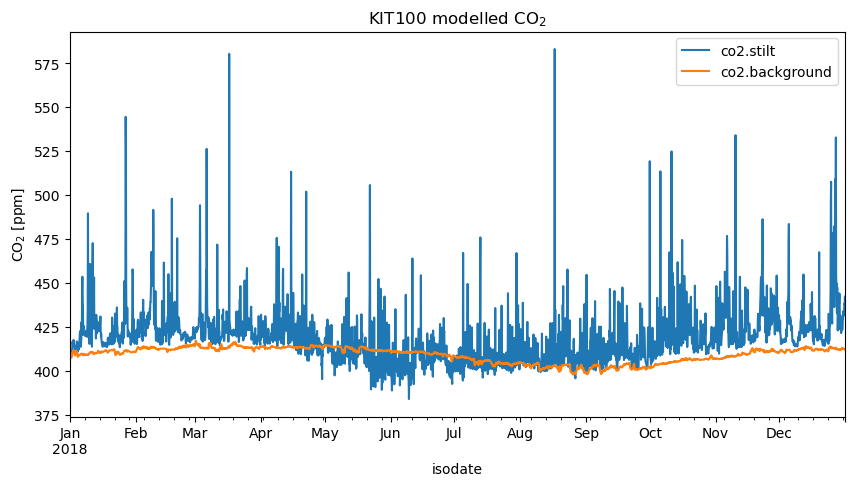

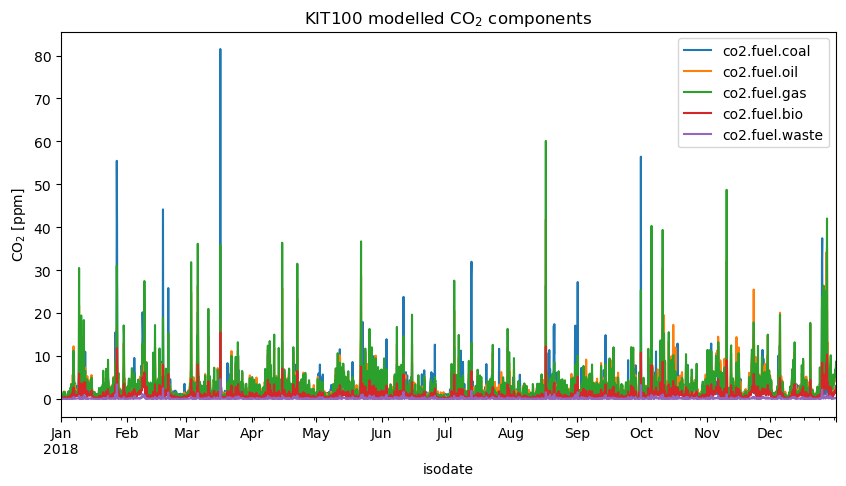

In [4]:
# plot the modelled concentrations 
STILT_time_series.plot(y=['co2.stilt','co2.background'], 
                       title = STILT_station.id + ' modelled CO$_2$', 
                       ylabel = 'CO$_2$ [ppm]');

# plot the fuel components 
columns_to_plot = ['co2.fuel.coal', 'co2.fuel.oil', 'co2.fuel.gas', 'co2.fuel.bio', 'co2.fuel.waste']
STILT_time_series.plot(y=columns_to_plot, 
                       title = STILT_station.id + ' modelled CO$_2$ components', 
                       ylabel = 'CO$_2$ [ppm]');

# un-comment to display the modelled concentrations for CH4
#STILT_time_series.plot(y=['ch4.stilt','ch4.background'], 
#                       title = STILT_station.id + ' modelled CH$_4$', ylabel = 'ppb');

#### Retrieve and plot the average over the entire time period


,Mean values CO$_2$ [ppm]
co2.fuel.coal,1.950797
co2.fuel.oil,3.107622
co2.fuel.gas,2.892664
co2.fuel.bio,0.913081
co2.fuel.waste,0.147371


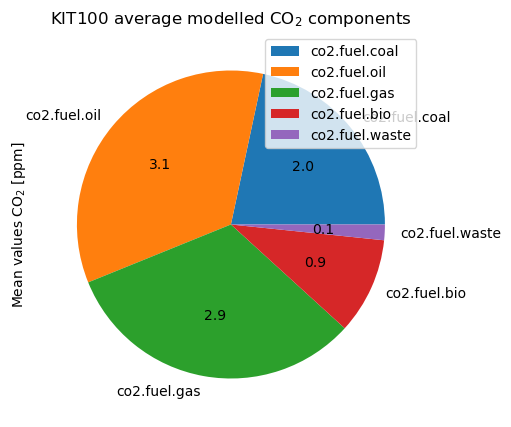

In [5]:
# select what columns to average and visualize
columns_to_plot = ['co2.fuel.coal', 'co2.fuel.oil', 'co2.fuel.gas', 'co2.fuel.bio', 'co2.fuel.waste']

STILT_co2_mean = STILT_time_series[columns_to_plot].agg('mean').to_frame(name='Mean values CO$_2$ [ppm]')

display(STILT_co2_mean)

# calculate the total to compute the percentage for autopct
total = STILT_co2_mean['Mean values CO$_2$ [ppm]'].sum()

# plot pie chart with actual values displayed
STILT_co2_mean.plot.pie(y='Mean values CO$_2$ [ppm]', 
                        autopct=lambda p: '{:.1f}'.format(p * total / 100),
                        title = STILT_station.id + ' average modelled CO$_2$ components')

plt.show()

# un-comment for CH4 example
#columns_to_plot = ['ch4.agriculture','ch4.waste','ch4.energy','ch4.other_categories']

#STILT_ch4_mean = STILT_time_series[columns_to_plot].agg('mean').to_frame(name='Mean values (ppb)')

#total = STILT_ch4_mean['Mean values (ppb)'].sum()

#STILT_ch4_mean.plot.pie(y='Mean values (ppb)', 
#                        autopct=lambda p: '{:.1f}'.format(p * total / 100), 
#                        title = STILT_station.id + ' average modelled CH$_4$ components')

#plt.show()

#### Retrieve and plot the daily averages

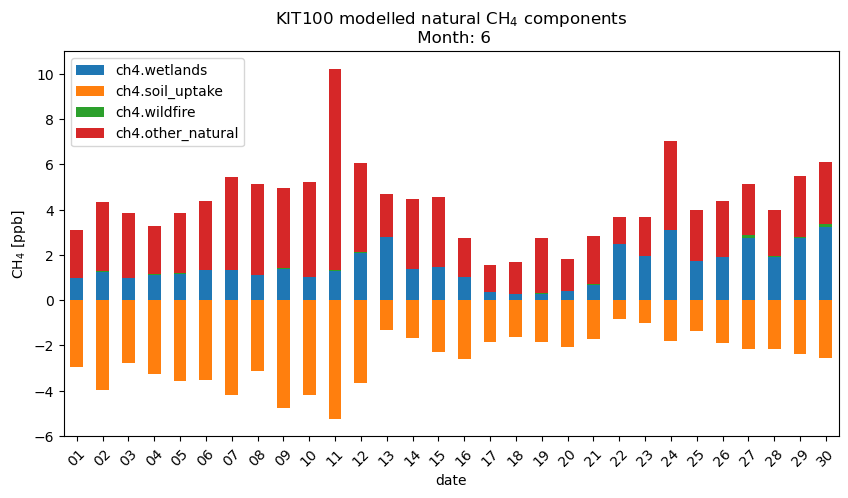

In [6]:
# create dataframe with daily averages
STILT_ch4_daily_average = STILT_time_series[columns_ch4].resample('D').mean().reset_index()

# convert to datetime for proper display on y-axis
STILT_ch4_daily_average['date'] = pd.to_datetime(STILT_ch4_daily_average['isodate'], format='%Y-%m-%d')

# filter for specific month
month_to_plot = 6

# choose components to plot
columns_to_plot = ['ch4.wetlands', 'ch4.soil_uptake', 'ch4.wildfire', 'ch4.other_natural']

# subset to specific month
STILT_ch4_daily_average_subset = STILT_ch4_daily_average[STILT_ch4_daily_average['date'].dt.month == month_to_plot]

# set 'date' as the index which is the x-axis in the final graph
STILT_ch4_daily_average_subset.set_index('date', inplace=True)

ax = STILT_ch4_daily_average_subset[columns_to_plot].plot.bar(stacked=True, 
                                                              ylabel = 'CH$_4$ [ppb]', 
                                                              title = STILT_station.id + ' modelled natural CH$_4$ components \n Month: ' + str(month_to_plot))

# set the x-axis major formatter to display dates properly
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

# adjust the x-axis date labels to prevent overlap
plt.xticks(rotation=45)

plt.show()


## Observations

Get the observations that match modelled concentrations from STILT. CO$_2$ and CH$_4$ are in this case loaded separately and afterwards combined into one dataset. 

In this example we use the official ICOS CO$_2$ and CH$_4$ release data sets.


#### Load the data

In [7]:
# URL for official ICOS CO2 molar fraction release data
datatype_co2='http://meta.icos-cp.eu/resources/cpmeta/atcCo2L2DataObject'
# stilt.fetch_observations_pandas retrieves observation data and metadata for a list of STILT stations, 
# but in this example our list has only a single station
obs_data_meta_co2 = stilt.fetch_observations_pandas(datatype_co2, [STILT_station])
STILT_station_obs_meta_co2 = obs_data_meta_co2['KIT100'].dobj
# show the metadata for the observation dataset
print(STILT_station_obs_meta_co2)
STILT_station_obs_data_co2 = obs_data_meta_co2['KIT100'].df
# show the observation data
display(STILT_station_obs_data_co2.head())

# URL for official ICOS CH4 molar fraction release data
datatype_ch4='http://meta.icos-cp.eu/resources/cpmeta/atcCh4L2DataObject'
#obs_ch4 = stilt.fetch_observations_pandas(datatype_ch4, [STILT_station])
#STILT_station_obs_ch4 = obs_ch4['KIT100']
#display(STILT_station_obs_ch4.head())
obs_data_meta_ch4 = stilt.fetch_observations_pandas(datatype_ch4, [STILT_station])
#STILT_station_obs_co2 = obs_co2['KIT100']
#display(STILT_station_obs_co2.head())
STILT_station_obs_meta_ch4 = obs_data_meta_ch4['KIT100'].dobj
# show the metadata for the observation dataset
print(STILT_station_obs_meta_ch4)
STILT_station_obs_data_ch4 = obs_data_meta_ch4['KIT100'].df
# show the observation data
display(STILT_station_obs_data_ch4.head())

DataObjectLite(uri='https://meta.icos-cp.eu/objects/O-a4Y-x7I6JXywyj2pqrqfIy', filename='ICOS_ATC_L2_L2-2024.1_KIT_100.0_CTS_CO2.zip', size_bytes=1278801, datatype_uri='http://meta.icos-cp.eu/resources/cpmeta/atcCo2L2DataObject', station_uri='http://meta.icos-cp.eu/resources/stations/AS_KIT', sampling_height=100.0, submission_time=datetime.datetime(2024, 6, 27, 13, 29, 28, 550000, tzinfo=datetime.timezone.utc), time_start=datetime.datetime(2016, 12, 16, 0, 0, tzinfo=datetime.timezone.utc), time_end=datetime.datetime(2024, 3, 31, 23, 0, tzinfo=datetime.timezone.utc))


,Flag,NbPoints,Stdev,TIMESTAMP,co2
0,O,11,3.676,2016-12-16 00:00:00,438.404999
1,O,12,14.796,2016-12-16 01:00:00,445.002014
2,O,12,2.694,2016-12-16 02:00:00,429.300995
3,O,12,2.015,2016-12-16 03:00:00,427.951996
4,O,12,1.067,2016-12-16 04:00:00,425.632996


DataObjectLite(uri='https://meta.icos-cp.eu/objects/oYzEy71UpMyinAGSI-BtMUTl', filename='ICOS_ATC_L2_L2-2024.1_KIT_100.0_CTS_CH4.zip', size_bytes=1443056, datatype_uri='http://meta.icos-cp.eu/resources/cpmeta/atcCh4L2DataObject', station_uri='http://meta.icos-cp.eu/resources/stations/AS_KIT', sampling_height=100.0, submission_time=datetime.datetime(2024, 6, 27, 13, 29, 23, 212000, tzinfo=datetime.timezone.utc), time_start=datetime.datetime(2016, 12, 16, 0, 0, tzinfo=datetime.timezone.utc), time_end=datetime.datetime(2024, 3, 31, 23, 0, tzinfo=datetime.timezone.utc))


,Flag,NbPoints,Stdev,TIMESTAMP,ch4
0,O,11,8.018000,2016-12-16 00:00:00,2043.140015
1,O,12,93.874001,2016-12-16 01:00:00,2085.179932
2,O,12,5.067000,2016-12-16 02:00:00,2020.520020
3,O,12,5.077000,2016-12-16 03:00:00,2021.329956
4,O,12,2.529000,2016-12-16 04:00:00,2016.160034


In [8]:
# Combine CO2 and CH4 observations into one dataset
STILT_station_obs = STILT_station_obs_data_co2.merge(STILT_station_obs_data_ch4,on='TIMESTAMP',suffixes=('_co2','_ch4'))
display(STILT_station_obs.head())

,Flag_co2,NbPoints_co2,Stdev_co2,TIMESTAMP,co2,Flag_ch4,NbPoints_ch4,Stdev_ch4,ch4
0,O,11,3.676,2016-12-16 00:00:00,438.404999,O,11,8.018000,2043.140015
1,O,12,14.796,2016-12-16 01:00:00,445.002014,O,12,93.874001,2085.179932
2,O,12,2.694,2016-12-16 02:00:00,429.300995,O,12,5.067000,2020.520020
3,O,12,2.015,2016-12-16 03:00:00,427.951996,O,12,5.077000,2021.329956
4,O,12,1.067,2016-12-16 04:00:00,425.632996,O,12,2.529000,2016.160034


#### Compare observations and STILT model result
While ICOS observations are hourly, the STILT results are only available 3-hourly. Therefore we have to merge the two datasets for further analysis.

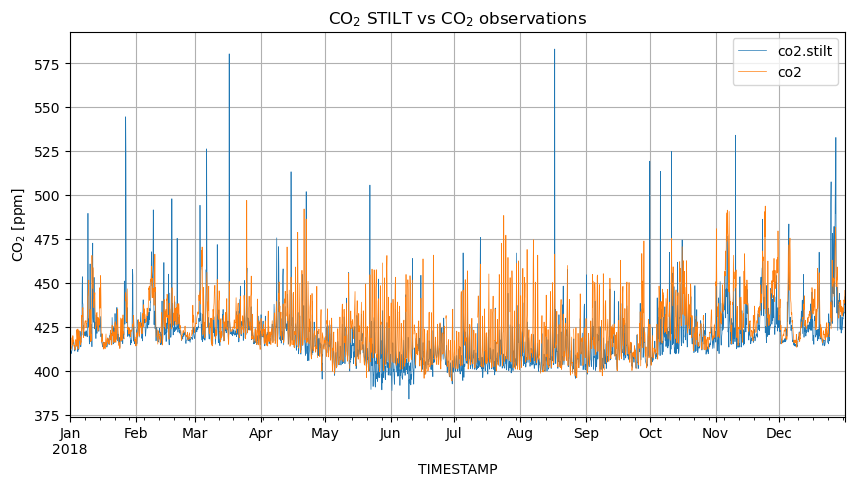

In [9]:
# merge the observations to the STILT model results
STILT_model_obs = STILT_time_series.merge(STILT_station_obs, left_on = STILT_time_series.index, right_on = 'TIMESTAMP')
STILT_model_obs.set_index('TIMESTAMP', inplace=True)

ax = STILT_model_obs.plot(y = ['co2.stilt', 'co2'], grid=True, linewidth=0.5, ylabel = 'CO$_2$ [ppm]')

plt.title('CO$_2$ STILT vs CO$_2$ observations')

plt.show()

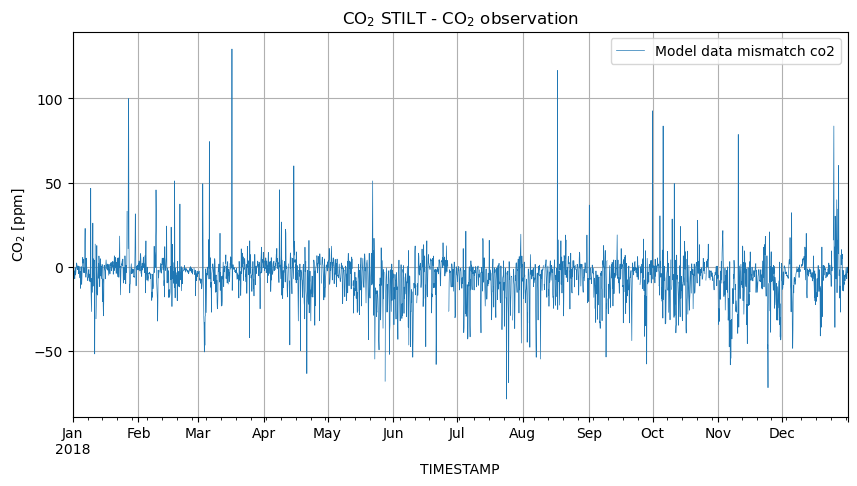

In [10]:
# add a column with the model data mismatch
STILT_model_obs['Model data mismatch co2'] = STILT_model_obs['co2.stilt']-STILT_model_obs['co2']

ax = STILT_model_obs.plot(y = ['Model data mismatch co2'], grid=True, linewidth=0.5, ylabel = 'CO$_2$ [ppm]')

plt.title('CO$_2$ STILT - CO$_2$ observation')

plt.show()

#### Zoom options
If you would like to zoom in to just see a few days or weeks, <br>
- either enable interactive plots by activating this line in the first cell 
    
    `%matplotlib widget`  
    
    and rerun the notebook
- or restrict the plot to a specific time span like in the next cell.

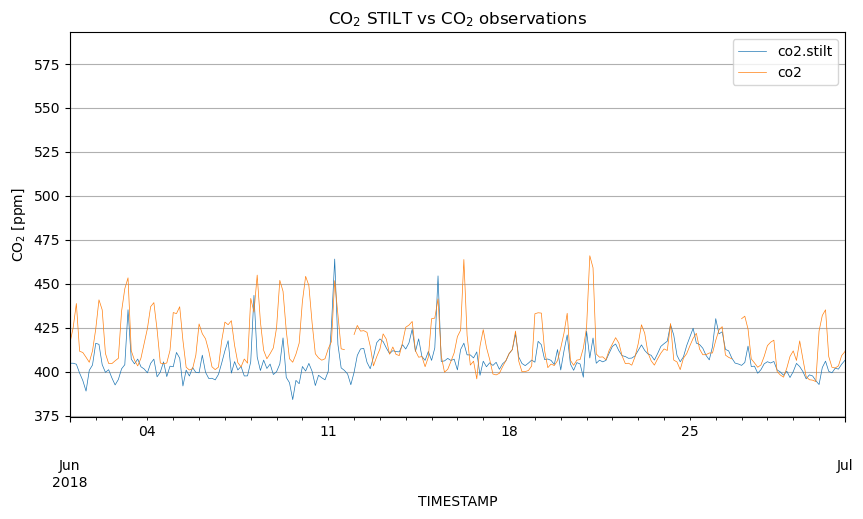

In [11]:
# start and end date of plot
plot_start = '2018-06-01 00:00:00'
plot_end = '2018-07-01 00:00:00'

ax = STILT_model_obs.plot(y = ['co2.stilt', 'co2'], 
                                 grid=True, linewidth=0.5, xlim = (plot_start, plot_end), ylabel = 'CO$_2$ [ppm]')

plt.title('CO$_2$ STILT vs CO$_2$ observations')
plt.show()

### Compare CO$_2$ and CH$_4$


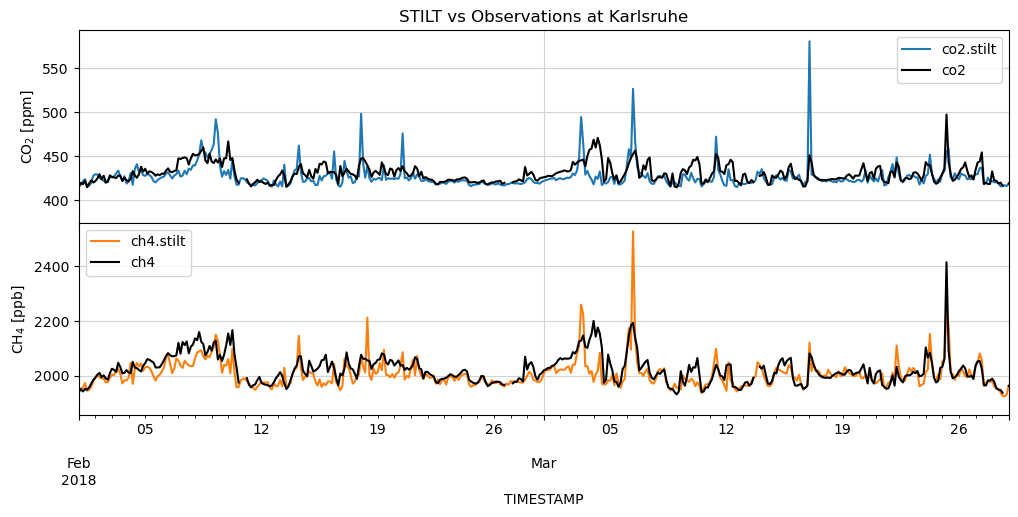

In [12]:
# plot the CO2 and CH4 time series in one plot with shared time axis
fig, axs = plt.subplots(2, 1, figsize=(12,5), sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

plot_start = '2018-02-01 00:00:00'
plot_end = '2018-03-29 00:00:00'

i=0
STILT_model_obs.plot(y=['co2.stilt'], xlim = (plot_start, plot_end), color= 'tab:blue', ax=axs[i]) 
STILT_model_obs.plot(y=['co2'], xlim = (plot_start, plot_end), color= 'k', ax=axs[i])
axs[i].set_ylabel('CO$_2$ [ppm]')
axs[i].grid(axis='both',color='lightgray')
axs[i].set_title('STILT vs Observations at '+STILT_station.name)

i+=1
STILT_model_obs.plot(y=['ch4.stilt'], xlim = (plot_start, plot_end), color= 'tab:orange', ax=axs[i])
STILT_model_obs.plot(y=['ch4'], xlim = (plot_start, plot_end), color ='k', ax=axs[i])
axs[i].set_ylabel('CH$_4$ [ppb]')
axs[i].grid(axis='both',color='lightgray')
plt.show()